In [41]:
#####################################################
# File Name: Aug_Using_Stanford.ipynb
# Author: Tu Lan @ SJSU EE258
# Modify Date: 12/10/2017
#####################################################

import scipy.io
import numpy as np
import pandas as pd
from tqdm import tqdm
import os
import cv2
from glob import glob

INPUT_PATH = '/media/tulan/Linux/Pycharm/Kaggle/Kaggle_Competetion/Dog Breed/input'
ROOT_PATH = '/media/tulan/Linux/Pycharm/Kaggle/Kaggle_Competetion/Dog Breed/input/stanford'
Annotation_PATH = '/media/tulan/Linux/Pycharm/Kaggle/Kaggle_Competetion/Dog Breed/input/stanford/Annotation'
IMAGE_PATH = '/media/tulan/Linux/Pycharm/Kaggle/Kaggle_Competetion/Dog Breed/input/stanford/Images'
LIST_PATH = '/media/tulan/Linux/Pycharm/Kaggle/Kaggle_Competetion/Dog Breed/input/stanford/lists'

In [57]:
mat_all = scipy.io.loadmat(LIST_PATH + '/file_list.mat')

df = pd.read_csv(INPUT_PATH + '/labels.csv')
n = mat_all['labels'].shape[0]
breed = sorted(set(df['breed']))  # make breed in order
n_class = len(breed)
class_to_num = dict(zip(breed, range(n_class)))
num_to_class = dict(zip(range(n_class), breed))
n

20580

In [55]:
IMAGE_FLODER = sorted(glob(IMAGE_PATH + '/*'))
len(IMAGE_FLODER), class_to_num['chihuahua']

(120, 29)

In [60]:
y = np.zeros((n, n_class), dtype=np.uint8)

i = 0
for foldname in sorted(os.listdir(IMAGE_PATH)):
    BreedName = foldname[10:].lower()
    for img in os.listdir(os.path.join(IMAGE_PATH, foldname)):
        y[i][class_to_num[BreedName]] = 1 
        i += 1

(20580, 120)

In [70]:
np.save(INPUT_PATH + '/y_train_aug.npy', y)
y[20579], num_to_class[2]

(array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0], dtype=uint8), 'african_hunting_dog')

In [74]:
width = 350
X = np.zeros((n, width, width, 3), dtype=np.uint8)

i = 0
for path in tqdm(IMAGE_FLODER):
    for img in sorted(glob(path + '/*')):
        X[i] = cv2.resize(cv2.imread(img), (width, width))
        i += 1

  0%|          | 0/120 [00:00<?, ?it/s]

  1%|          | 1/120 [00:01<03:22,  1.70s/it]

  2%|▏         | 2/120 [00:02<02:21,  1.20s/it]

  2%|▎         | 3/120 [00:03<02:06,  1.08s/it]

  3%|▎         | 4/120 [00:03<01:50,  1.05it/s]

  4%|▍         | 5/120 [00:04<01:45,  1.09it/s]

  5%|▌         | 6/120 [00:05<01:39,  1.15it/s]

  6%|▌         | 7/120 [00:05<01:34,  1.19it/s]

  7%|▋         | 8/120 [00:06<01:29,  1.25it/s]

  8%|▊         | 9/120 [00:07<01:27,  1.26it/s]

  8%|▊         | 10/120 [00:09<01:42,  1.08it/s]

  9%|▉         | 11/120 [00:09<01:38,  1.10it/s]

 10%|█         | 12/120 [00:10<01:36,  1.12it/s]

 11%|█         | 13/120 [00:11<01:34,  1.14it/s]

 12%|█▏        | 14/120 [00:12<01:31,  1.16it/s]

 12%|█▎        | 15/120 [00:12<01:30,  1.17it/s]

 13%|█▎        | 16/120 [00:13<01:27,  1.19it/s]

 14%|█▍        | 17/120 [00:14<01:25,  1.20it/s]

 15%|█▌        | 18/120 [00:14<01:23,  1.22it/s]

 16%|█▌        | 19/120 [00:15<01:21,  1.24it/s]

 17%|█▋        | 20/120 [00:16<01:20,  1.25it/s]

 18%|█▊        | 21/120 [00:16<01:18,  1.26it/s]

 18%|█▊        | 22/120 [00:17<01:17,  1.26it/s]

 19%|█▉        | 23/120 [00:18<01:16,  1.27it/s]

 20%|██        | 24/120 [00:18<01:15,  1.27it/s]

 21%|██        | 25/120 [00:19<01:14,  1.28it/s]

 22%|██▏       | 26/120 [00:20<01:13,  1.29it/s]

 22%|██▎       | 27/120 [00:21<01:12,  1.28it/s]

 23%|██▎       | 28/120 [00:21<01:11,  1.29it/s]

 24%|██▍       | 29/120 [00:22<01:09,  1.30it/s]

 25%|██▌       | 30/120 [00:22<01:08,  1.32it/s]

 26%|██▌       | 31/120 [00:23<01:07,  1.31it/s]

 27%|██▋       | 32/120 [00:24<01:06,  1.32it/s]

 28%|██▊       | 33/120 [00:24<01:05,  1.33it/s]

 28%|██▊       | 34/120 [00:25<01:04,  1.34it/s]

 29%|██▉       | 35/120 [00:26<01:03,  1.34it/s]

 30%|███       | 36/120 [00:26<01:02,  1.35it/s]

 31%|███       | 37/120 [00:27<01:01,  1.35it/s]

 32%|███▏      | 38/120 [00:27<00:59,  1.37it/s]

 32%|███▎      | 39/120 [00:28<00:59,  1.37it/s]

 33%|███▎      | 40/120 [00:29<00:58,  1.36it/s]

 34%|███▍      | 41/120 [00:30<00:57,  1.36it/s]

 35%|███▌      | 42/120 [00:30<00:57,  1.36it/s]

 36%|███▌      | 43/120 [00:31<00:56,  1.36it/s]

 37%|███▋      | 44/120 [00:32<00:55,  1.36it/s]

 38%|███▊      | 45/120 [00:33<00:55,  1.36it/s]

 38%|███▊      | 46/120 [00:33<00:54,  1.37it/s]

 39%|███▉      | 47/120 [00:34<00:53,  1.36it/s]

 40%|████      | 48/120 [00:35<00:52,  1.36it/s]

 41%|████      | 49/120 [00:35<00:51,  1.37it/s]

 42%|████▏     | 50/120 [00:36<00:51,  1.37it/s]

 42%|████▎     | 51/120 [00:37<00:50,  1.37it/s]

 43%|████▎     | 52/120 [00:37<00:49,  1.37it/s]

 44%|████▍     | 53/120 [00:38<00:48,  1.38it/s]

 45%|████▌     | 54/120 [00:39<00:48,  1.37it/s]

 46%|████▌     | 55/120 [00:40<00:47,  1.37it/s]

 47%|████▋     | 56/120 [00:40<00:46,  1.37it/s]

 48%|████▊     | 57/120 [00:41<00:45,  1.38it/s]

 48%|████▊     | 58/120 [00:42<00:45,  1.38it/s]

 49%|████▉     | 59/120 [00:42<00:44,  1.38it/s]

 50%|█████     | 60/120 [00:43<00:43,  1.36it/s]

 51%|█████     | 61/120 [00:44<00:43,  1.36it/s]

 52%|█████▏    | 62/120 [00:45<00:42,  1.37it/s]

 52%|█████▎    | 63/120 [00:45<00:41,  1.37it/s]

 53%|█████▎    | 64/120 [00:46<00:40,  1.37it/s]

 54%|█████▍    | 65/120 [00:47<00:39,  1.38it/s]

 55%|█████▌    | 66/120 [00:47<00:39,  1.38it/s]

 56%|█████▌    | 67/120 [00:48<00:38,  1.38it/s]

 57%|█████▋    | 68/120 [00:48<00:37,  1.39it/s]

 57%|█████▊    | 69/120 [00:49<00:36,  1.39it/s]

 58%|█████▊    | 70/120 [00:50<00:35,  1.39it/s]

 59%|█████▉    | 71/120 [00:51<00:35,  1.39it/s]

 60%|██████    | 72/120 [00:51<00:34,  1.39it/s]

 61%|██████    | 73/120 [00:52<00:33,  1.39it/s]

 62%|██████▏   | 74/120 [00:52<00:32,  1.40it/s]

 62%|██████▎   | 75/120 [00:53<00:32,  1.40it/s]

 63%|██████▎   | 76/120 [00:54<00:31,  1.41it/s]

 64%|██████▍   | 77/120 [00:54<00:30,  1.41it/s]

 65%|██████▌   | 78/120 [00:55<00:29,  1.42it/s]

 66%|██████▌   | 79/120 [00:55<00:28,  1.42it/s]

 67%|██████▋   | 80/120 [00:56<00:28,  1.41it/s]

 68%|██████▊   | 81/120 [00:57<00:27,  1.41it/s]

 68%|██████▊   | 82/120 [00:57<00:26,  1.41it/s]

 69%|██████▉   | 83/120 [00:58<00:26,  1.41it/s]

 70%|███████   | 84/120 [00:59<00:25,  1.42it/s]

 71%|███████   | 85/120 [00:59<00:24,  1.42it/s]

 72%|███████▏  | 86/120 [01:00<00:23,  1.42it/s]

 72%|███████▎  | 87/120 [01:01<00:23,  1.43it/s]

 73%|███████▎  | 88/120 [01:01<00:22,  1.43it/s]

 74%|███████▍  | 89/120 [01:02<00:21,  1.42it/s]

 75%|███████▌  | 90/120 [01:03<00:21,  1.43it/s]

 76%|███████▌  | 91/120 [01:03<00:20,  1.42it/s]

 77%|███████▋  | 92/120 [01:04<00:19,  1.42it/s]

 78%|███████▊  | 93/120 [01:05<00:18,  1.43it/s]

 78%|███████▊  | 94/120 [01:05<00:18,  1.43it/s]

 79%|███████▉  | 95/120 [01:06<00:17,  1.42it/s]

 80%|████████  | 96/120 [01:07<00:16,  1.41it/s]

 81%|████████  | 97/120 [01:08<00:16,  1.41it/s]

 82%|████████▏ | 98/120 [01:09<00:15,  1.41it/s]

 82%|████████▎ | 99/120 [01:09<00:14,  1.42it/s]

 83%|████████▎ | 100/120 [01:10<00:14,  1.42it/s]

 84%|████████▍ | 101/120 [01:11<00:13,  1.42it/s]

 85%|████████▌ | 102/120 [01:11<00:12,  1.42it/s]

 86%|████████▌ | 103/120 [01:12<00:11,  1.42it/s]

 87%|████████▋ | 104/120 [01:13<00:11,  1.42it/s]

 88%|████████▊ | 105/120 [01:14<00:10,  1.42it/s]

 88%|████████▊ | 106/120 [01:15<00:09,  1.41it/s]

 89%|████████▉ | 107/120 [01:15<00:09,  1.41it/s]

 90%|█████████ | 108/120 [01:16<00:08,  1.41it/s]

 91%|█████████ | 109/120 [01:17<00:07,  1.41it/s]

 92%|█████████▏| 110/120 [01:18<00:07,  1.40it/s]

 92%|█████████▎| 111/120 [01:19<00:06,  1.40it/s]

 93%|█████████▎| 112/120 [01:20<00:05,  1.40it/s]

 94%|█████████▍| 113/120 [01:20<00:05,  1.40it/s]

 95%|█████████▌| 114/120 [01:21<00:04,  1.40it/s]

 96%|█████████▌| 115/120 [01:22<00:03,  1.40it/s]

 97%|█████████▋| 116/120 [01:22<00:02,  1.40it/s]

 98%|█████████▊| 117/120 [01:23<00:02,  1.40it/s]

 98%|█████████▊| 118/120 [01:24<00:01,  1.40it/s]

 99%|█████████▉| 119/120 [01:24<00:00,  1.40it/s]

100%|██████████| 120/120 [01:25<00:00,  1.41it/s]

In [77]:
X.shape

(20580, 350, 350, 3)

In [80]:
np.save(INPUT_PATH + '/X_train_350_aug.npy', X)

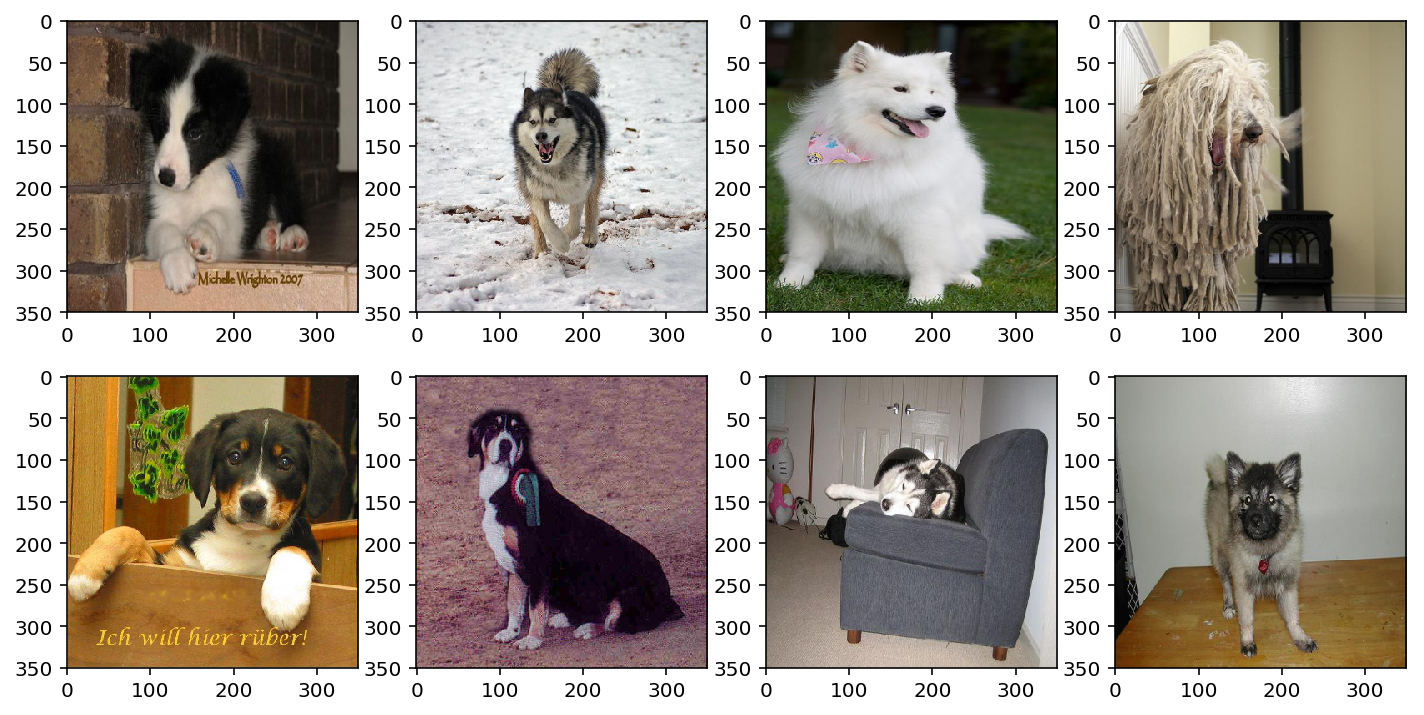

In [79]:
import random
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.figure(figsize=(12, 6))
for i in range(8):
    random_index = random.randint(0, n-1)
    plt.subplot(2, 4, i+1)
    plt.imshow(X[random_index][:,:,::-1])